<a href="https://colab.research.google.com/github/jonasfover/2-Semester-/blob/master/football_champion_league.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

In [5]:

import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
with open('/content/drive/MyDrive/2 semester/data_merge.json') as json_data:
    data = json.load(json_data)

In [7]:
df = pd.json_normalize(data, max_level=3)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 119 entries, id to block.save_block
dtypes: float64(33), int64(9), object(77)
memory usage: 15.8+ MB


In [9]:
df.describe()

,index,period,minute,second,possession,duration,type.id,possession_team.id,play_pattern.id,team.id,tactics.formation,player.id,position.id,pass.recipient.id,pass.length,pass.angle,pass.height.id,pass.type.id,pass.body_part.id,pass.outcome.id,ball_receipt.outcome.id,duel.type.id,dribble.outcome.id,duel.outcome.id,shot.statsbomb_xg,shot.type.id,shot.outcome.id,shot.technique.id,shot.body_part.id,goalkeeper.position.id,goalkeeper.type.id,interception.outcome.id,goalkeeper.technique.id,50_50.outcome.id,goalkeeper.outcome.id,foul_committed.type.id,goalkeeper.body_part.id,substitution.outcome.id,substitution.replacement.id,bad_behaviour.card.id,foul_committed.card.id,pass.technique.id
count,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,10682.000000,17361.000000,17361.000000,17361.000000,17361.000000,25.000000,17090.000000,17090.000000,4427.000000,4706.000000,4706.000000,4706.000000,823.000000,4475.000000,925.000000,646.0,239.000000,136.000000,147.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,175.000000,85.000000,49.000000,10.000000,76.000000,6.000000,34.000000,29.000000,29.000000,5.0,9.000000,10.0
mean,1740.209262,1.498934,45.347503,29.368182,94.572951,1.628528,32.153793,779.885490,2.455331,780.528599,1726.480000,5248.072206,11.453189,5206.776372,22.097505,0.023536,1.525287,65.182260,39.808939,20.004324,9.0,10.615063,8.411765,12.482993,0.111095,86.680000,98.093333,93.026667,39.293333,43.846667,30.971429,10.435294,45.571429,2.200000,41.144737,23.500000,36.441176,102.896552,5756.413793,7.0,6.888889,108.0
std,1008.584549,0.500013,27.353172,17.330922,57.333007,8.580951,12.067856,7.585186,2.129581,7.854517,1815.284829,2014.428004,7.178851,1962.210860,14.820781,1.551357,0.829515,1.871369,3.967673,24.735090,0.0,0.487602,0.493972,4.630681,0.165563,2.880902,1.619291,0.866581,3.774778,0.501497,2.533519,5.375090,0.500000,1.398412,18.623071,1.224745,2.500802,0.309934,3077.827661,0.0,0.333333,0.0
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,770.000000,1.000000,770.000000,343.000000,2954.000000,1.000000,2954.000000,0.000000,-3.099950,1.000000,61.000000,37.000000,9.000000,9.0,10.000000,8.000000,4.000000,0.007396,62.000000,96.000000,90.000000,37.000000,42.000000,25.000000,4.000000,45.000000,1.000000,15.000000,21.000000,35.000000,102.000000,2954.000000,7.0,6.000000,108.0
25%,869.000000,1.000000,22.000000,14.000000,44.000000,0.787000,30.000000,773.000000,1.000000,773.000000,433.000000,3944.000000,5.000000,3831.000000,12.010399,-1.190290,1.000000,64.000000,38.000000,9.000000,9.0,10.000000,8.000000,13.000000,0.023619,87.000000,97.000000,93.000000,38.000000,44.000000,32.000000,4.000000,45.000000,1.000000,15.000000,24.000000,35.000000,103.000000,4826.000000,7.0,7.000000,108.0
50%,1737.000000,1.000000,45.000000,29.000000,96.000000,1.253000,30.000000,781.000000,1.000000,781.000000,442.000000,5549.000000,12.000000,5547.000000,18.439089,0.000000,1.000000,66.000000,40.000000,9.000000,9.0,11.000000,8.000000,14.000000,0.043956,87.000000,98.000000,93.000000,40.000000,44.000000,32.000000,13.000000,46.000000,1.500000,53.000000,24.000000,35.000000,103.000000,5587.000000,7.0,7.000000,108.0
75%,2605.000000,2.000000,68.000000,44.000000,141.000000,1.933000,42.000000,786.000000,4.000000,786.000000,4231.000000,5601.000000,17.000000,5596.000000,28.160255,1.230571,2.000000,66.000000,40.000000,9.000000,9.0,11.000000,9.000000,16.000000,0.105720,87.000000,100.000000,93.000000,40.000000,44.000000,32.000000,16.000000,46.000000,3.750000,55.000000,24.000000,37.250000,103.000000,5834.000000,7.0,7.000000,108.0
max,3720.000000,2.000000,98.000000,59.000000,220.000000,878.440000,43.000000,795.000000,9.000000,795.000000,4411.000000,20005.000000,25.000000,20005.000000,102.859120,3.141593,3.000000,67.000000,70.000000,77.000000,9.0,11.000000,9.000000,16.000000,0.842828,88.000000,101.000000,95.000000,70.000000,44.000000,34.000000,16.000000,46.000000,4.000000,59.000000,24.000000,41.000000,103.000000,19988.000000,7.0,7.00000

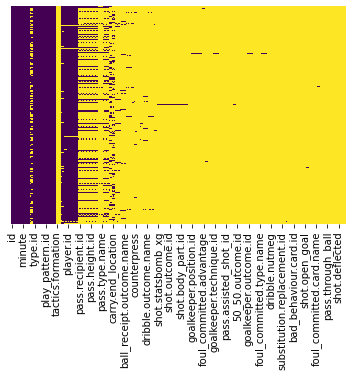

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
print(df.columns)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type.id', 'type.name',
       ...
       'foul_committed.penalty', 'shot.one_on_one', 'pass.miscommunication',
       'pass.through_ball', 'pass.technique.id', 'pass.technique.name',
       'block.deflection', 'shot.deflected', 'foul_won.penalty',
       'block.save_block'],
      dtype='object', length=119)


In [12]:
df.head(10)

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,under_pressure,carry.end_location,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,...,shot.first_time,50_50.outcome.id,50_50.outcome.name,block.offensive,foul_won.defensive,goalkeeper.outcome.id,goalkeeper.outcome.name,shot.aerial_won,foul_committed.type.id,foul_committed.type.name,goalkeeper.body_part.id,goalkeeper.body_part.name,dribble.overrun,dribble.nutmeg,ball_recovery.offensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,pass.backheel,foul_committed.offensive,bad_behaviour.card.id,bad_behaviour.card.name,injury_stoppage.in_chain,pass.goal_assist,shot.open_goal,pass.deflected,miscontrol.aerial_won,foul_committed.card.id,foul_committed.card.name,foul_committed.penalty,shot.one_on_one,pass.miscommunication,pass.through_ball,pass.technique.id,pass.technique.name,block.deflection,shot.deflected,foul_won.penalty,block.save_block
0,68add300-4d97-42e4-bd31-437fc946379a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,781,Brazil,1,Regular Play,781,Brazil,433.0,"[{'player': {'id': 5547, 'name': 'Alisson Rams...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a7e47efe-8e4c-4594-b97a-33bcd3df74de,2,1,00:00:00.000,0,0,1,38.786,35,Starting XI,781,Brazil,1,Regular Play,795,Costa Rica,343.0,"[{'player': {'id': 5597, 'name': 'Keylor Navas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,793be941-4c64-4b5a-b632-ae617171f839,3,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,781,Brazil,NaN,NaN,[beac7e80-9c47-429e-8900-23ad07a9a6f1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,beac7e80-9c47-429e-8900-23ad07a9a6f1,4,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,795,Costa Rica,NaN,NaN,[793be941-4c64-4b5a-b632-ae617171f839],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acbef1b4-497b-4106-baf9-b005e20dd3da,5,1,00:00:01.080,0,1,2,2.760,30,Pass,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,NaN,[65349833-cfe2-4966-bfc0-ff12fc6de814],"[61, 40]",5586.0,Marcos Danilo Ureña Porras,23.0,Center Forward,5597.0,Keylor Navas Gamboa,40.00000,3.141593,1.0,Ground Pass,"[21, 40]",65.0,Kick Off,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,65349833-cfe2-4966-bfc0-ff12fc6de814,6,1,00:00:03.840,0,3,2,NaN,42,Ball Receipt*,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,NaN,[acbef1b4-497b-4106-baf9-b005e20dd3da],"[21, 40]",5597.0,Keylor Navas Gamboa,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

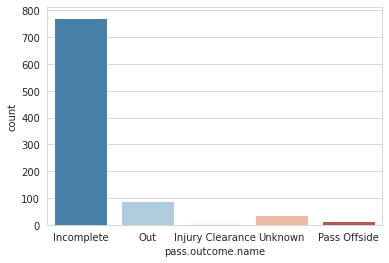

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='pass.outcome.name',data=df,palette='RdBu_r')

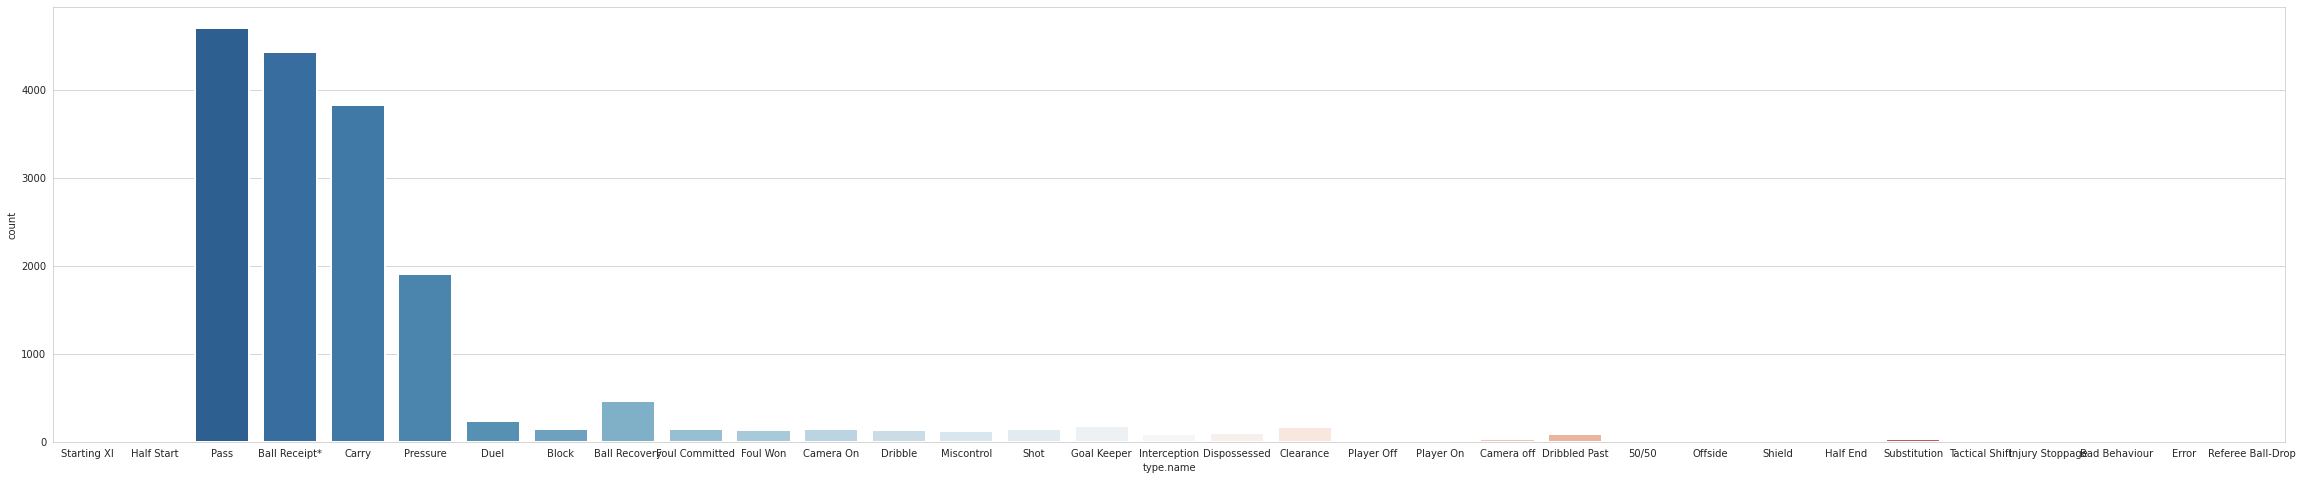

In [14]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 40,8
sns.set_style('whitegrid')
sns.countplot(x='type.name'	,data=df,palette='RdBu_r',linewidth = 2)

In [15]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

In [16]:
outcome = df['pass.outcome.name']


In [17]:
outcome.value_counts(ascending=True)


Injury Clearance     11
Pass Offside         16
Unknown              38
Out                  88
Incomplete          772
Name: pass.outcome.name, dtype: int64

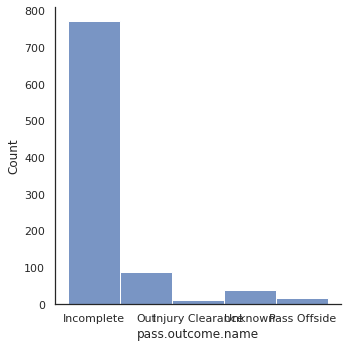

In [18]:
sns.displot(outcome)

In [19]:
df.columns


Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type.id', 'type.name',
       ...
       'foul_committed.penalty', 'shot.one_on_one', 'pass.miscommunication',
       'pass.through_ball', 'pass.technique.id', 'pass.technique.name',
       'block.deflection', 'shot.deflected', 'foul_won.penalty',
       'block.save_block'],
      dtype='object', length=119)

In [20]:
df.head(15)

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,under_pressure,carry.end_location,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,...,shot.first_time,50_50.outcome.id,50_50.outcome.name,block.offensive,foul_won.defensive,goalkeeper.outcome.id,goalkeeper.outcome.name,shot.aerial_won,foul_committed.type.id,foul_committed.type.name,goalkeeper.body_part.id,goalkeeper.body_part.name,dribble.overrun,dribble.nutmeg,ball_recovery.offensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,pass.backheel,foul_committed.offensive,bad_behaviour.card.id,bad_behaviour.card.name,injury_stoppage.in_chain,pass.goal_assist,shot.open_goal,pass.deflected,miscontrol.aerial_won,foul_committed.card.id,foul_committed.card.name,foul_committed.penalty,shot.one_on_one,pass.miscommunication,pass.through_ball,pass.technique.id,pass.technique.name,block.deflection,shot.deflected,foul_won.penalty,block.save_block
0,68add300-4d97-42e4-bd31-437fc946379a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,781,Brazil,1,Regular Play,781,Brazil,433.0,"[{'player': {'id': 5547, 'name': 'Alisson Rams...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a7e47efe-8e4c-4594-b97a-33bcd3df74de,2,1,00:00:00.000,0,0,1,38.786,35,Starting XI,781,Brazil,1,Regular Play,795,Costa Rica,343.0,"[{'player': {'id': 5597, 'name': 'Keylor Navas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,793be941-4c64-4b5a-b632-ae617171f839,3,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,781,Brazil,NaN,NaN,[beac7e80-9c47-429e-8900-23ad07a9a6f1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,beac7e80-9c47-429e-8900-23ad07a9a6f1,4,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,795,Costa Rica,NaN,NaN,[793be941-4c64-4b5a-b632-ae617171f839],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acbef1b4-497b-4106-baf9-b005e20dd3da,5,1,00:00:01.080,0,1,2,2.760,30,Pass,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,NaN,[65349833-cfe2-4966-bfc0-ff12fc6de814],"[61, 40]",5586.0,Marcos Danilo Ureña Porras,23.0,Center Forward,5597.0,Keylor Navas Gamboa,40.000000,3.141593,1.0,Ground Pass,"[21, 40]",65.0,Kick Off,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,65349833-cfe2-4966-bfc0-ff12fc6de814,6,1,00:00:03.840,0,3,2,NaN,42,Ball Receipt*,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,NaN,[acbef1b4-497b-4106-baf9-b005e20dd3da],"[21, 40]",5597.0,Keylor Navas Gamboa,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Stam og event data

In [21]:
stam_data = df.iloc[:, :24]

In [22]:
stam_data

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name
0,68add300-4d97-42e4-bd31-437fc946379a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,781,Brazil,1,Regular Play,781,Brazil,433.0,"[{'player': {'id': 5547, 'name': 'Alisson Rams...",NaN,NaN,NaN,NaN,NaN,NaN
1,a7e47efe-8e4c-4594-b97a-33bcd3df74de,2,1,00:00:00.000,0,0,1,38.786,35,Starting XI,781,Brazil,1,Regular Play,795,Costa Rica,343.0,"[{'player': {'id': 5597, 'name': 'Keylor Navas...",NaN,NaN,NaN,NaN,NaN,NaN
2,793be941-4c64-4b5a-b632-ae617171f839,3,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,781,Brazil,NaN,NaN,[beac7e80-9c47-429e-8900-23ad07a9a6f1],NaN,NaN,NaN,NaN,NaN
3,beac7e80-9c47-429e-8900-23ad07a9a6f1,4,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,795,Costa Rica,NaN,NaN,[793be941-4c64-4b5a-b632-ae617171f839],NaN,NaN,NaN,NaN,NaN
4,acbef1b4-497b-4106-baf9-b005e20dd3da,5,1,00:00:01.080,0,1,2,2.760,30,Pass,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,NaN,[65349833-cfe2-4966-bfc0-ff12fc6de814],"[61, 40]",5586.0,Marcos Danilo Ureña Porras,23.0,Center Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,155d6903-d2ae-4f8a-8e3f-3389198658c2,3480,2,00:48:02.840,93,2,220,1.040,30,Pass,782,Belgium,1,Regular Play,782,Belgium,NaN,NaN,"[1b550f6a-12c9-492f-9459-456bf9ea31a8, 3a10345...","[53, 18]",3077.0,Jan Vertonghen,5.0,Left Center Back
17357,1b550f6a-12c9-492f-9459-456bf9ea31a8,3481,2,00:48:03.880,93,3,220,NaN,42,Ball Receipt*,782,Belgium,1,Regular Play,782,Belgium,NaN,NaN,[155d6903-d2ae-4f8a-8e3f-3389198658c2],"[72, 28]",3457.0,Michy Batshuayi Tunga,23.0,Center Forward
17358,c8fef122-50f7-4609-9dc0-84d179367d85,3482,2,00:48:04.240,93,4,220,0.440,17,Pressure,782,Belgium,1,Regular Play,777,Tunisia,NaN,NaN,NaN,"[46, 52]",4826.0,Yohan Benalouane,3.0,Right Center Back
17359,00c07daf-457a-4fb0-a15f-d224c5c4a63b,3483,2,00:48:07.000,93,7,220,NaN,34,Half End,782,Belgium,1,Regular Play,782,Belgium,NaN,NaN,[1d99dccf-8a6a-4907-9c3a-af192d9cc81f],NaN,NaN,NaN,NaN,NaN


In [23]:
#problemer med Tactic.lineup
stam_data = stam_data.drop('tactics.lineup', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [24]:
#tactics = stam_data['tactics.lineup']

In [25]:
#tactics_all = tactics[0:2]

In [26]:
#tactics1 = tactics[0]

In [27]:
#tactics2 = tactics[1]

In [28]:
#tactics2[0]

In [29]:
event_data = df.iloc[:, 24:]

In [30]:
#problemer med  
event_data = event_data.drop('shot.freeze_frame', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [31]:
#stam_data.to_excel("stam.xlsx")  

In [32]:
#event_data.to_excel("event.xlsx")  

In [33]:
#stam_data['location'] = stam_data['location'].fillna(0)

In [34]:
#stam_data['tactics.lineup'] = stam_data['tactics.lineup'].fillna(0)

In [35]:
#stam_data['related_events'] = stam_data['related_events'].fillna(0)

In [36]:
#data_subset['location'] = data_subset['location'].fillna(0)

## Data procesing for player Clustering



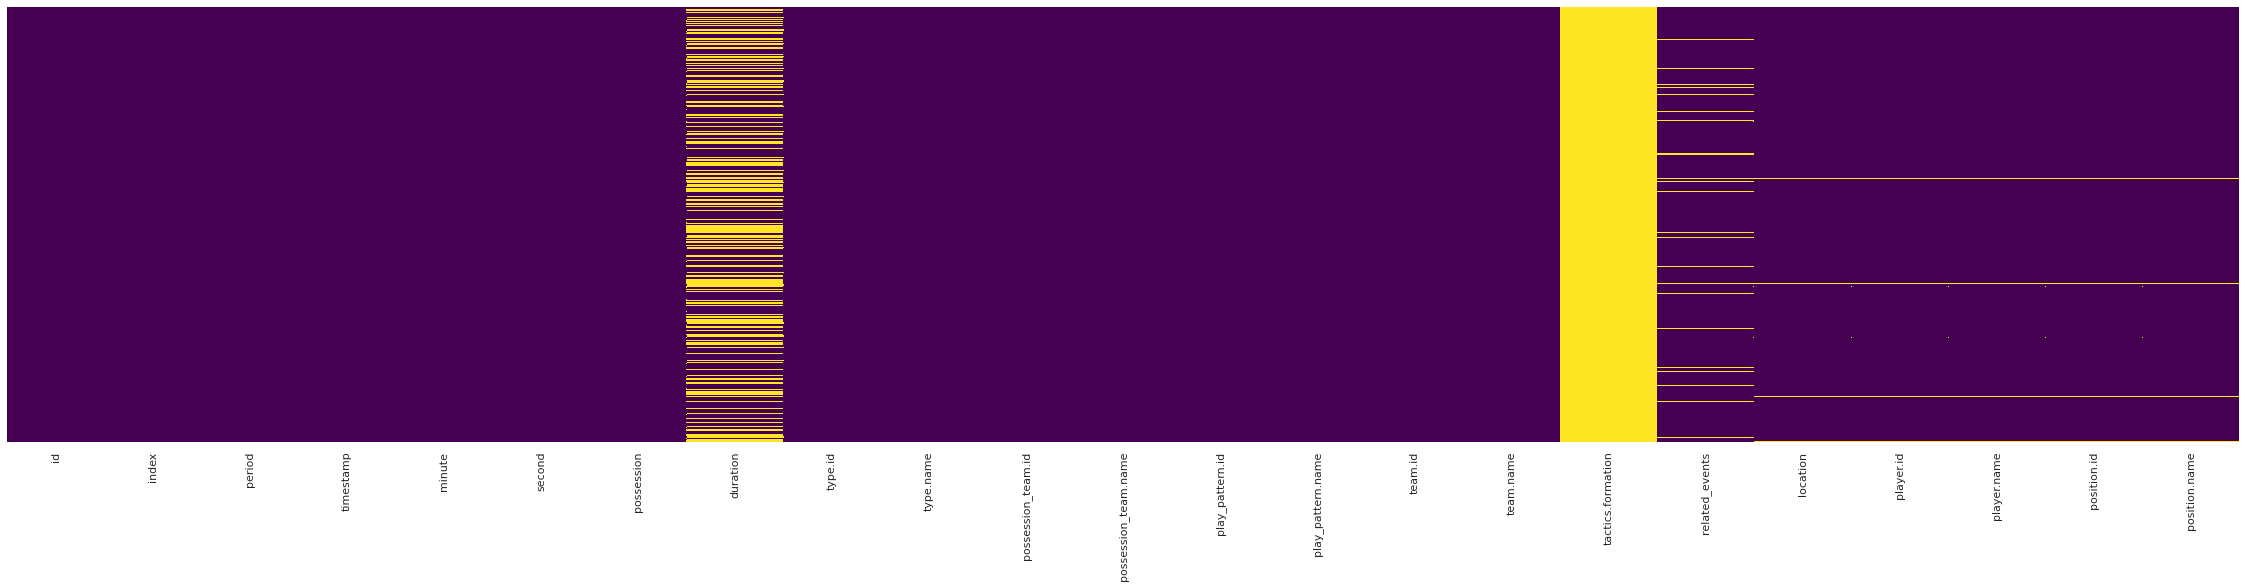

In [37]:
sns.heatmap(stam_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

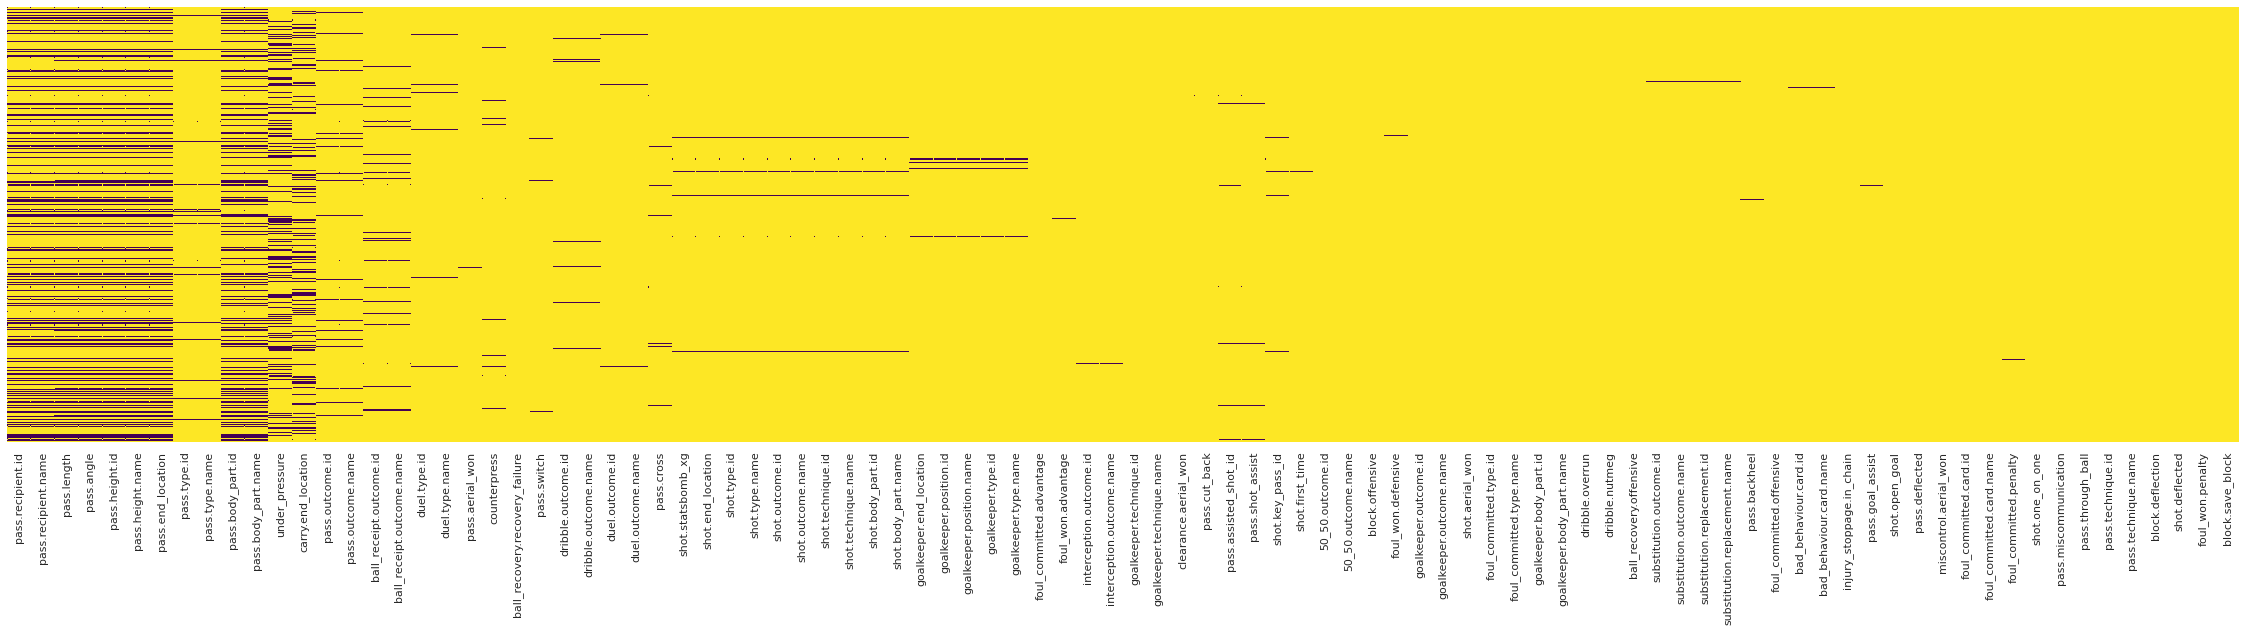

In [38]:
sns.heatmap(event_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
player_name = stam_data['player.name'].unique() 

In [40]:
player_name = player_name[1:]

In [41]:
len(player_name)


138

In [42]:
# find all the importen values for clustering our players
sorted_df = df[['player.name','position.id','possession','play_pattern.id',
                'duration','location','pass.length','pass.angle', 'pass.height.id',
                'pass.end_location', 'pass.body_part.id']]

In [43]:
sorted_df

,player.name,position.id,possession,play_pattern.id,duration,location,pass.length,pass.angle,pass.height.id,pass.end_location,pass.body_part.id
0,NaN,NaN,1,1,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1,1,38.786,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Marcos Danilo Ureña Porras,23.0,2,9,2.760,"[61, 40]",40.000000,3.141593,1.0,"[21, 40]",40.0
...,...,...,...,...,...,...,...,...,...,...,...
17356,Jan Vertonghen,5.0,220,1,1.040,"[53, 18]",21.470911,0.484478,1.0,"[72, 28]",38.0
17357,Michy Batshuayi Tunga,23.0,220,1,NaN,"[72, 28]",NaN,NaN,NaN,NaN,NaN
17358,Yohan Benalouane,3.0,220,1,0.440,"[46, 52]",NaN,NaN,NaN,NaN,NaN
17359,NaN,NaN,220,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


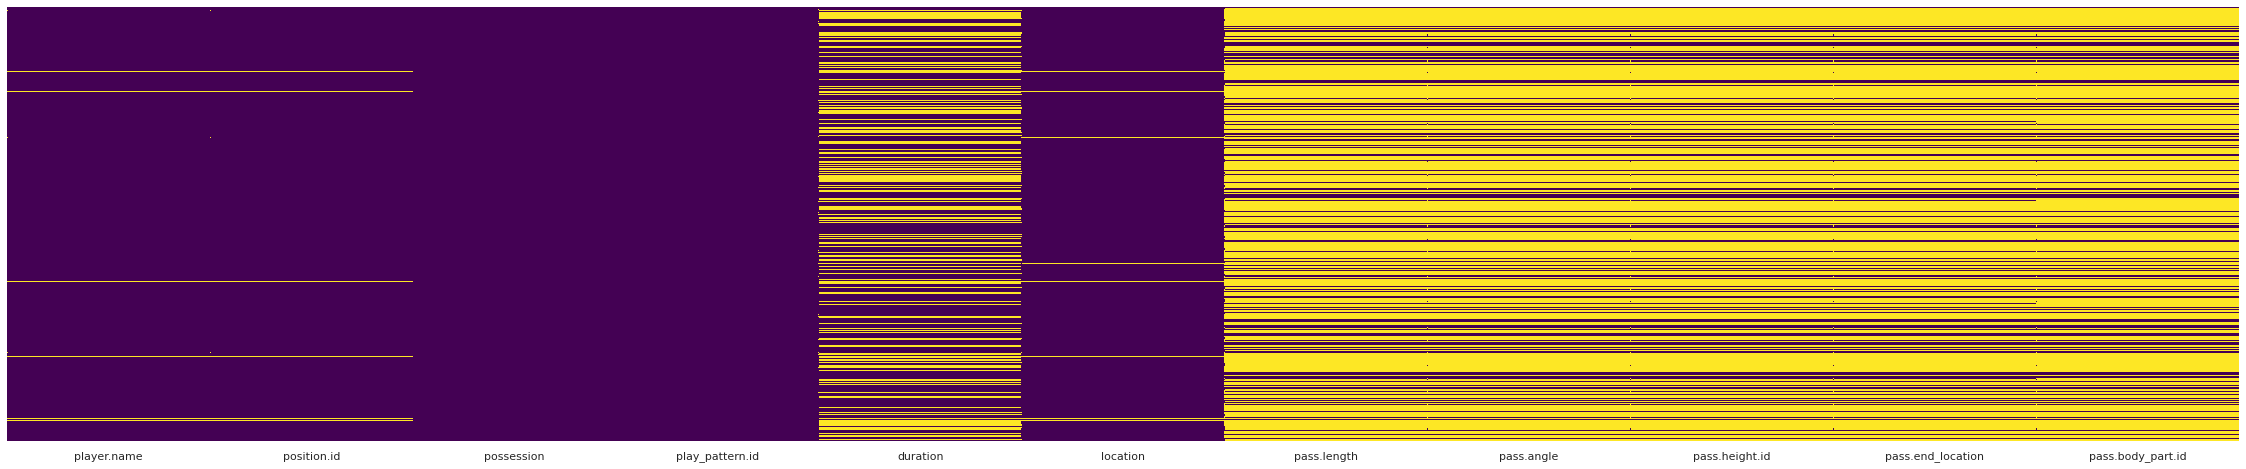

In [44]:
sns.heatmap(sorted_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
sorted_df.groupby('player.name').mean()

,position.id,possession,play_pattern.id,duration,pass.length,pass.angle,pass.height.id,pass.body_part.id
player.name,,,,,,,,
Adem Ljajić,20.320755,181.113208,3.018868,1.843200,21.183231,0.692432,1.272727,39.818182
Ahmed Musa,22.231293,100.965986,2.428571,1.437763,16.958717,0.534656,1.413793,39.653846
Albin Ekdal,15.000000,81.731183,2.516129,1.427266,21.712192,-0.185559,1.523810,39.428571
Aleksandar Kolarov,6.000000,102.269231,2.730769,1.630417,23.362193,1.042345,1.888889,39.064516
Aleksandar Mitrović,23.000000,98.988701,3.209040,1.089657,13.510997,0.280063,1.368421,42.647059
...,...,...,...,...,...,...,...,...
Yeltsin Ignacio Tejeda Valverde,16.000000,161.750000,1.700000,1.627750,25.025241,-0.831527,1.800000,39.600000
Yohan Benalouane,3.000000,158.861538,3.200000,1.336167,24.908474,-0.340797,1.812500,39.200000
Youri Tielemans,18.000000,210.600000,2.000000,1.723250,33.709977,-0.513459,2.333333,40.000000


In [46]:
average = sorted_df.groupby('player.name').mean()

In [47]:
average

,position.id,possession,play_pattern.id,duration,pass.length,pass.angle,pass.height.id,pass.body_part.id
player.name,,,,,,,,
Adem Ljajić,20.320755,181.113208,3.018868,1.843200,21.183231,0.692432,1.272727,39.818182
Ahmed Musa,22.231293,100.965986,2.428571,1.437763,16.958717,0.534656,1.413793,39.653846
Albin Ekdal,15.000000,81.731183,2.516129,1.427266,21.712192,-0.185559,1.523810,39.428571
Aleksandar Kolarov,6.000000,102.269231,2.730769,1.630417,23.362193,1.042345,1.888889,39.064516
Aleksandar Mitrović,23.000000,98.988701,3.209040,1.089657,13.510997,0.280063,1.368421,42.647059
...,...,...,...,...,...,...,...,...
Yeltsin Ignacio Tejeda Valverde,16.000000,161.750000,1.700000,1.627750,25.025241,-0.831527,1.800000,39.600000
Yohan Benalouane,3.000000,158.861538,3.200000,1.336167,24.908474,-0.340797,1.812500,39.200000
Youri Tielemans,18.000000,210.600000,2.000000,1.723250,33.709977,-0.513459,2.333333,40.000000


In [48]:
average.to_excel("playerMean.xlsx")

In [49]:
type(sorted_df)

pandas.core.frame.DataFrame

NameError: ignored

## Data Processing

In [ ]:
data_subset = df[['pass.outcome.name','type.id','type.name','pass.length','pass.angle','location','pass.end_location','pass.height.id','pass.type.name','pass.body_part.name','under_pressure']]

In [ ]:
data_subset.head()

In [ ]:
data_subset.head()

In [ ]:
df['pass.outcome.name'].value_counts(ascending=True)


In [ ]:
# Keeps only rows without a missing value
df1 = data_subset[data_subset['type.name'].str.startswith('Pass', na=False)]


In [ ]:
df1.head()

In [ ]:
df1['pass.outcome.name'].value_counts()

In [ ]:
df1['pass.outcome.name'] = df['pass.outcome.name'].replace(np.nan, 1)


In [ ]:
df1.head()

In [ ]:
df2 = df1.replace('Incomplete',0)

In [ ]:
df2.head()

In [ ]:
df3 = df2[~df2['pass.outcome.name'].isin(['Out','Injury Clearance','Pass Offside','Unknown'])]

In [ ]:
df3['pass.outcome.name'].value_counts(ascending=True)

In [ ]:
df3

In [ ]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df3.columns

In [ ]:
# df3.drop('pass.type.name',axis=1,inplace=True) #,'pass.body_part.name','under_pressure'
df3.drop('pass.body_part.name',axis=1,inplace=True)
df3.drop('under_pressure',axis=1,inplace=True)

In [ ]:
df3.drop('type.name',axis=1,inplace=True)
df3.drop('type.id',axis=1,inplace=True)
df3.drop('location',axis=1,inplace=True)
df3.drop('pass.end_location',axis=1,inplace=True)

In [ ]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df3.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('pass.outcome.name',axis=1), 
                                                    df3['pass.outcome.name'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
y_train.value_counts(ascending=True)




In [ ]:
y_test.value_counts(ascending=True)

In [ ]:
1117 / (1117 + 2664)

In [ ]:
stam_data

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,related_events,location,player.id,player.name,position.id,position.name
0,68add300-4d97-42e4-bd31-437fc946379a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,781,Brazil,1,Regular Play,781,Brazil,433.0,NaN,NaN,NaN,NaN,NaN,NaN
1,a7e47efe-8e4c-4594-b97a-33bcd3df74de,2,1,00:00:00.000,0,0,1,38.786,35,Starting XI,781,Brazil,1,Regular Play,795,Costa Rica,343.0,NaN,NaN,NaN,NaN,NaN,NaN
2,793be941-4c64-4b5a-b632-ae617171f839,3,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,781,Brazil,NaN,[beac7e80-9c47-429e-8900-23ad07a9a6f1],NaN,NaN,NaN,NaN,NaN
3,beac7e80-9c47-429e-8900-23ad07a9a6f1,4,1,00:00:00.000,0,0,1,NaN,18,Half Start,781,Brazil,1,Regular Play,795,Costa Rica,NaN,[793be941-4c64-4b5a-b632-ae617171f839],NaN,NaN,NaN,NaN,NaN
4,acbef1b4-497b-4106-baf9-b005e20dd3da,5,1,00:00:01.080,0,1,2,2.760,30,Pass,795,Costa Rica,9,From Kick Off,795,Costa Rica,NaN,[65349833-cfe2-4966-bfc0-ff12fc6de814],"[61, 40]",5586.0,Marcos Danilo Ureña Porras,23.0,Center Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,155d6903-d2ae-4f8a-8e3f-3389198658c2,3480,2,00:48:02.840,93,2,220,1.040,30,Pass,782,Belgium,1,Regular Play,782,Belgium,NaN,"[1b550f6a-12c9-492f-9459-456bf9ea31a8, 3a10345...","[53, 18]",3077.0,Jan Vertonghen,5.0,Left Center Back
17357,1b550f6a-12c9-492f-9459-456bf9ea31a8,3481,2,00:48:03.880,93,3,220,NaN,42,Ball Receipt*,782,Belgium,1,Regular Play,782,Belgium,NaN,[155d6903-d2ae-4f8a-8e3f-3389198658c2],"[72, 28]",3457.0,Michy Batshuayi Tunga,23.0,Center Forward
17358,c8fef122-50f7-4609-9dc0-84d179367d85,3482,2,00:48:04.240,93,4,220,0.440,17,Pressure,782,Belgium,1,Regular Play,777,Tunisia,NaN,NaN,"[46, 52]",4826.0,Yohan Benalouane,3.0,Right Center Back
17359,00c07daf-457a-4fb0-a15f-d224c5c4a63b,3483,2,00:48:07.000,93,7,220,NaN,34,Half End,782,Belgium,1,Regular Play,782,Belgium,NaN,[1d99dccf-8a6a-4907-9c3a-af192d9cc81f],NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.heatmap(stam_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
event_data

In [ ]:
sns.heatmap(event_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
stam_data['player.name'].value_counts(ascending=True)

In [ ]:
player_name = stam_data['player.name'].unique()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()


In [ ]:
y_test = y_test.to_frame()


In [ ]:
type(y_test)

pandas.core.frame.DataFrame

In [ ]:
y_train = y_train.to_frame()


In [ ]:
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
X_train.shape

(3187, 3)

In [ ]:
y_train.shape

(3187, 1)

In [ ]:
X_train=X_train.astype('int')
y_train=y_train.astype('int')

In [ ]:
X_test=X_test.astype('int')
y_test=y_test.astype('int')

In [ ]:
X_train

,pass.length,pass.angle,pass.height.id
12663,7,0,1
3015,10,0,1
12065,21,0,1
17016,12,2,1
3610,15,0,1
...,...,...,...
15562,18,-1,1
15894,16,0,1
2109,19,0,1
5046,72,0,3


In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,r2_score

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       249
           1       0.82      1.00      0.90      1117

    accuracy                           0.82      1366
   macro avg       0.91      0.51      0.47      1366
weighted avg       0.85      0.82      0.74      1366



In [ ]:
print(confusion_matrix(y_test,predictions))

[[   4  245]
 [   0 1117]]


In [ ]:
(4+1117) /(245+4+1117)

0.8206442166910688

In [ ]:
1117 - (1117-0)

In [ ]:
print(r2_score(y_test,predictions))

-0.2032732541625768


In [ ]:
r2_score(y_test, predictions, multioutput='variance_weighted')

-0.2032732541625768

Lav Det om til excel filer


In [ ]:
X_train.to_excel("X_train.xlsx")  
X_test.to_excel("X_test.xlsx")  
y_train.to_excel("y_train.xlsx")  
y_test.to_excel("y_test.xlsx")


## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions_tree = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions_tree))

              precision    recall  f1-score   support

           0       0.53      0.42      0.47       249
           1       0.88      0.92      0.90      1117

    accuracy                           0.83      1366
   macro avg       0.70      0.67      0.68      1366
weighted avg       0.81      0.83      0.82      1366



## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=80)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.54      0.37      0.44       249
           1       0.87      0.93      0.90      1117

    accuracy                           0.83      1366
   macro avg       0.70      0.65      0.67      1366
weighted avg       0.81      0.83      0.81      1366



In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[  91  158]
 [  78 1039]]


## testing


In [ ]:
pip install lucifer-ml

     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 308 kB 29.0 MB/s 
     |████████████████████████████████| 564 kB 53.9 MB/s 
     |████████████████████████████████| 76.1 MB 48 kB/s 
     |████████████████████████████████| 80 kB 3.1 MB/s 
     |████████████████████████████████| 210 kB 48.4 MB/s 
     |████████████████████████████████| 75 kB 3.9 MB/s 
     |████████████████████████████████| 49 kB 3.8 MB/s 
     |████████████████████████████████| 149 kB 50.2 MB/s 
     |████████████████████████████████| 113 kB 8.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=3e9a309cfc85c829e1ca1676c014ea1ed89dc1dcf9fda1c52f4d432f96f1d64e
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


## K-mean for player clustering


In [95]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.cluster import KMeans

In [116]:
df = pd.read_excel(r'/content/playerMean.xlsx')


In [117]:
df

,player.name,position.id,possession,play_pattern.id,duration,pass.length,pass.angle,pass.height.id,pass.body_part.id
0,Adem Ljajić,20.320755,181.113208,3.018868,1.843200,21.183231,0.692432,1.272727,39.818182
1,Ahmed Musa,22.231293,100.965986,2.428571,1.437763,16.958717,0.534656,1.413793,39.653846
2,Albin Ekdal,15.000000,81.731183,2.516129,1.427266,21.712192,-0.185559,1.523810,39.428571
3,Aleksandar Kolarov,6.000000,102.269231,2.730769,1.630417,23.362193,1.042345,1.888889,39.064516
4,Aleksandar Mitrović,23.000000,98.988701,3.209040,1.089657,13.510997,0.280063,1.368421,42.647059
...,...,...,...,...,...,...,...,...,...
133,Yeltsin Ignacio Tejeda Valverde,16.000000,161.750000,1.700000,1.627750,25.025241,-0.831527,1.800000,39.600000
134,Yohan Benalouane,3.000000,158.861538,3.200000,1.336167,24.908474,-0.340797,1.812500,39.200000
135,Youri Tielemans,18.000000,210.600000,2.000000,1.723250,33.709977,-0.513459,2.333333,40.000000
136,Óscar Esau Duarte Gaitán,4.800000,76.814286,2.971429,1.623073,25.645538,0.687890,1.916667,39.190476


In [118]:
df.shape

(138, 9)

In [119]:
df.describe().columns

Index(['position.id', 'possession', 'play_pattern.id', 'duration',
       'pass.length', 'pass.angle', 'pass.height.id', 'pass.body_part.id'],
      dtype='object')

In [120]:
df = df[['player.name','position.id', 'possession', 'play_pattern.id',
       'pass.length', 'pass.angle', 'pass.height.id']]

In [101]:
## replace null values
df.isnull().sum()

player.name          0
position.id          0
possession           0
play_pattern.id      0
duration             0
pass.length          0
pass.angle           0
pass.height.id       0
pass.body_part.id    0
dtype: int64

In [121]:
names = df['player.name'].tolist() # saving names for later names 

In [122]:
df = df.drop(['player.name'], axis=1) # drop the short_name column 

In [123]:
df.head()

,position.id,possession,play_pattern.id,pass.length,pass.angle,pass.height.id
0,20.320755,181.113208,3.018868,21.183231,0.692432,1.272727
1,22.231293,100.965986,2.428571,16.958717,0.534656,1.413793
2,15.000000,81.731183,2.516129,21.712192,-0.185559,1.523810
3,6.000000,102.269231,2.730769,23.362193,1.042345,1.888889
4,23.000000,98.988701,3.209040,13.510997,0.280063,1.368421


In [124]:
## normalize the data
from sklearn import preprocessing

x = df.values # numpy array

scaler = preprocessing.MinMaxScaler()

x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
      

In [125]:
X_norm

,0,1,2,3,4,5
0,0.805031,0.843440,0.658419,0.196418,0.520931,0.144385
1,0.884637,0.417897,0.455314,0.128224,0.479817,0.219067
2,0.583333,0.315770,0.485440,0.204956,0.292139,0.277311
3,0.208333,0.424817,0.559292,0.231591,0.612113,0.470588
4,0.916667,0.407399,0.723851,0.072570,0.413473,0.195046
...,...,...,...,...,...,...
133,0.625000,0.740631,0.204633,0.258437,0.123809,0.423529
134,0.083333,0.725294,0.720741,0.256552,0.251686,0.430147
135,0.708333,1.000000,0.307854,0.398629,0.206693,0.705882
136,0.158333,0.289664,0.642096,0.268450,0.519747,0.485294


##Use PCA to reduce 138 

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 20 PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

## K-mean clustering


In [127]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

# fit the input data
kmeans = kmeans.fit(reduced)

#get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_



In [128]:
# cluster values
clusters = kmeans.labels_.tolist()

In [129]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()
                

,x,y,cluster,name
0,-0.395643,0.203702,2,Adem Ljajić
1,-0.438562,0.098513,2,Ahmed Musa
2,-0.097431,0.024528,0,Albin Ekdal
3,0.260722,0.081087,1,Aleksandar Kolarov
4,-0.435029,0.209429,2,Aleksandar Mitrović


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()